In [1]:
from plyTo3Dmodel import ply_to_CityGML

In [2]:
import pcl
import pcl.pcl_visualization
import open3d as o3d
import numpy as np
from scipy.spatial.transform import Rotation as sc_Rotation

def display_numpy_color_cloud_pcl(cloud):
    visual = pcl.pcl_visualization.CloudViewing()
    if type(cloud).__module__ == np.__name__:
        #         ptcloud_centred = pcl.PointCloud()
        #         ptcloud_centred = pcl.PointCloud_PointXYZI()
        ptcloud_centred = pcl.PointCloud_PointXYZRGBA()
        ptcloud_centred.from_array(np.array(cloud, dtype=np.float32))
        #         visual.ShowGrayCloud(ptcloud_centred, b'cloud')
        visual.ShowColorACloud(ptcloud_centred, b'cloud')
    #         visual.ShowMonochromeCloud(ptcloud_centred, b'cloud')
    else:
        visual.ShowMonochromeCloud(cloud, b'cloud')
    v = True
    while v:
        v = not (visual.WasStopped())


def display_numpy_cloud_pcl(cloud, visual=None):
    wait_stop = False
    if visual is None:
        visual = pcl.pcl_visualization.CloudViewing()
        wait_stop = True
    if type(cloud).__module__ == np.__name__:
        ptcloud_centred = pcl.PointCloud()
        ptcloud_centred.from_array(np.array(cloud, dtype=np.float32))
        #         visual.ShowGrayCloud(ptcloud_centred, b'cloud')
        visual.ShowMonochromeCloud(ptcloud_centred, b'cloud')
        while wait_stop:
            wait_stop = not (visual.WasStopped())
        return ptcloud_centred
    else:
        visual.ShowMonochromeCloud(cloud, b'cloud')
        while wait_stop:
            wait_stop = not (visual.WasStopped())
        return cloud
    
        
def point_cloud_to_numpy(pointcloud_path, lib='open3d'):
    if lib == 'open3d':
        pcd = o3d.io.read_point_cloud(pointcloud_path)
        npcloud = np.asarray(pcd.points, dtype=np.float32)
    else:
        from pyntcloud import PyntCloud
        my_point_cloud = PyntCloud.from_file(pointcloud_path)
        npcloud = my_point_cloud.points.to_numpy()

    return npcloud

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2022-10-06 14:40:47,443 ply_to_CityGML [INFO]: Starting Process
['test', '../data/sample_data/original_data.ply', 0.052, 0.1]
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro T2000, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

INFO:tensorflow:Restoring parameters from n:\work\SLAM\src\PinSout\src/sem_seg/model/log_6cls/model.ckpt
2022-10-06 14:42:01,950 evaluate [INFO]: Starting the PointNet
2022-10-06 14:42:09,955 evaluate [INFO]: Result of Ceiling : 28010
2022-10-06 14:42:09,956 evaluate [INFO]: Result of Floor : 78986
2022-10-06 14:42:09,957 evaluate [INFO]: Result of Wall : 145097
2022-10-06 14:42:09,957 evaluate [INFO]: Result of Window : 0
2022-10-06 14:42:09,957 evaluate [INFO]: Result of Door : 363
2022-10-06 14:42:09,957 evaluate [INFO]: Result of Clutter : 34264
2022-10-06 14:42:09,95

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


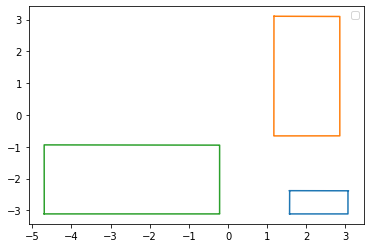

WKT data path: ../data/sample_data\original_data_result\WKT_RESULT


In [3]:
args = ["test", "../data/sample_data/original_data.ply", 0.052, 0.1]
wall_cloud, door_cloud, window_cloud = ply_to_CityGML(args)

In [16]:
lidar_map = "E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated.pcd"
lidar_map_ply = "E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated.ply"

In [11]:
import numpy as np
rot_x_degree = 1.9125263597395372
rot_y_degree = 5.069226703807043
rot_z_degree = -174.5
npCloud = point_cloud_to_numpy(lidar_map, lib='pynt')
Rot = sc_Rotation.from_euler('xyz',[rot_x_degree,rot_y_degree,rot_z_degree],degrees=True).as_matrix()
Rot = np.r_[np.c_[Rot.T, np.zeros((3, 1))], np.array([[0.0, 0.0, 0.0, 1.0]])]
# YR = get_rotation_vector_yaxis(rot_y_degree)
# XR = get_rotation_vector_xaxis(rot_x_degree)
# ZR = get_rotation_vector_zaxis(rot_z_degree)
# Rot = np.matmul(XR, YR)
# Rot = np.matmul(Rot,ZR)
npCloud = np.matmul(npCloud, Rot)

In [14]:
pclCloud = display_numpy_cloud_pcl(npCloud[:,:3])

In [15]:
pcl.save(pclCloud,"E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated.pcd")
# run command pcl_pcd2ply_release.exe -format O input GlobalMap_lotated.pcd GlobalMap_lotated.ply

In [17]:
args = ["test", lidar_map_ply, 0.052, 0.1]
wall_cloud, door_cloud, window_cloud = ply_to_CityGML(args)

2022-10-03 20:06:25,876 ply_to_CityGML [INFO]: Starting Process
['test', 'E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated.ply', 0.052, 0.1]
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro T2000, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

INFO:tensorflow:Restoring parameters from n:\work\SLAM\src\PinSout\src/sem_seg/model/log_6cls/model.ckpt
2022-10-03 20:13:19,594 evaluate [INFO]: Starting the PointNet
2022-10-03 21:48:47,270 evaluate [INFO]: Result of Ceiling : 8087310
2022-10-03 21:48:47,271 evaluate [INFO]: Result of Floor : 2864614
2022-10-03 21:48:47,271 evaluate [INFO]: Result of Wall : 1728336
2022-10-03 21:48:47,272 evaluate [INFO]: Result of Window : 0
2022-10-03 21:48:47,272 evaluate [INFO]: Result of Door

In [19]:
pclCloud = display_numpy_cloud_pcl(wall_cloud)

In [18]:
pcl.save(wall_cloud,"E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated_wall.pcd")

In [4]:
cloud_path = "E:/visual_localization_test/IndoorLocalization_custom/dataset/pangyo_agit_1f_v3/raw_data/lidar_slam_result/GlobalMap_lotated_wall.pcd"
npCloud = point_cloud_to_numpy(cloud_path, lib='pynt')
display_numpy_cloud_pcl(npCloud)

<PointCloud of 2759864 points>